In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls
!pwd
!cd /content/drive
print('done')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive  sample_data
/content
done


In [0]:
import pandas as pd
import matplotlib.pyplot as plt   
import numpy as np

In [0]:
# df1=pd.read_csv("/content/drive/My Drive/RK_ALDA_PROJ/release/50000.csv")
# df2=pd.read_csv('/content/drive/My Drive/RK_ALDA_PROJ/release/300000.csv')
# df3=pd.read_csv('/content/drive/My Drive/RK_ALDA_PROJ/release/400000.csv')
# df4=pd.read_csv('/content/drive/My Drive/RK_ALDA_PROJ/release/700000.csv')
# df5=pd.read_csv('/content/drive/My Drive/RK_ALDA_PROJ/release/till_last.csv')
# main=pd.concat([df1,df2,df3,df4,df5],axis=0)

In [0]:
data=pd.read_csv("/content/drive/My Drive/RK_ALDA_PROJ/RandomSample.csv",index_col=0)

In [0]:
data.head()

,Unnamed: 0.1,archive,compression,compression_bin,coverage,coverage_bin,date,density,density_bin,summary,text,title,url
14106,414105,https://web.archive.org/web/2008092919id_/http...,10.615385,low,0.500000,low,1970-01-01 00:33:28.092919,0.576923,abstractive,"In light of this Paul Newman's passing, we bri...","['cool', 'hand', 'luke', 'paul', 'leonard', 'n...",A Video Tribute to Paul Newman,http://mashable.com/2008/09/27/paul-newman/
84521,784521,https://web.archive.org/web/2011012419id_/http...,10.095238,low,0.571429,low,1970-01-01 00:33:31.012419,0.571429,abstractive,Collection of all USATODAY.com coverage of Ore...,"['former', 'vice', 'president', 'al', 'gore', ...",Oregon State Police,http://content.usatoday.com/topics/topic/Orego...
271324,971324,https://web.archive.org/web/2014021219id_/http...,52.350000,high,0.700000,low,1970-01-01 00:33:34.021219,1.200000,abstractive,"Iced-over roads cause accidents, traffic jams ...","['in', 'atlanta', 'another', 'recent', 'snowst...",Winter storm headed toward D.C. knocks out pow...,http://www.washingtonpost.com/politics/winter-...
32209,32209,http://web.archive.org/web/20160725100153id_/h...,53.692308,high,1.000000,high,1970-08-22 08:12:05.100153,1.307692,abstractive,Should the U.S. government have the right to s...,"['they', 'say', 'internet', 'know', 'border', ...",Microsoft's Latest Legal Battle: Why You Shoul...,http://fortune.com/2015/09/08/microsoft-legal-...
251601,951601,https://web.archive.org/web/2014120419id_/http...,31.727273,medium,0.909091,medium,1970-01-01 00:33:34.120419,1.636364,mixed,When the label says “raised cage free” and has...,"['if', 'buy', 'perdue', 'chicken', 'grocery', ...",Abusing Chickens We Eat,http://www.nytimes.com/2014/12/04/opinion/nich...


In [0]:
density = data["density"]

In [0]:
y = []
for i in range(1, 500001):
  y.append(i)
  

In [0]:
d = density.values.tolist()

In [0]:
d[0:5]

[0.5769230769, 0.5714285714, 1.2, 1.3076923077, 1.6363636363999998]

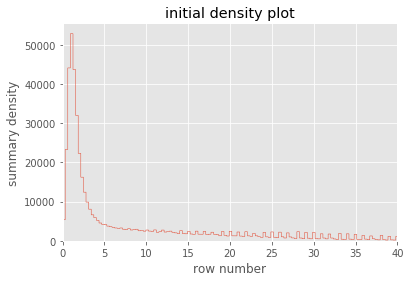

In [0]:
plt.hist(d[0:100000],bins='auto', histtype="step")
plt.xlim(0, 40)
plt.xlabel('row number') 
plt.ylabel('summary density') 
plt.title('initial density plot') 
plt.show() 

In [0]:
#COVERAGE PLOT
# plt.hist(d,bins=100)
# plt.xlim(0, 125)
  
# plt.xlabel('row number') 
# plt.ylabel('summary density') 
  
# plt.title('initial density plot') 
  
# plt.show() 

# from matplotlib.pyplot import figure
# figure(figsize=(80,6))

# plt.plot(y[0:100000],c[0:100000]) 
  
# plt.xlabel('row number') 
# plt.ylabel('summary coverage') 

# plt.title('initial coverage plot') 
# plt.show()

In [0]:
# for index, row in data[0:5].iterrows(): # actual code -> for row in data:
  
# #   for word in row["text"]:
#   print(row["text"])
#   print("\n")
# (((data[0:1]["text"][0][1:len(data[0:1]["text"][0]) - 1]).replace("'", "")).split(", "))

In [0]:
#Hyper Parameters for word2vec
settings = {
	'window_size': 200,	# context window +- center word , size varies from 100-300
	'n': 10,		# dimensions of word embeddings, also refer to size of hidden layer
	'epochs': 50,		# number of training epochs
	'learning_rate': 0.01	# learning rate
}


In [0]:
#declaring used variables
from collections import defaultdict
word_counts = {}
word_counts = defaultdict(lambda: 0, word_counts)
v_count = 0
words_list = []
word_index = {}
index_word = {}
word_vec = {}
window = settings["window_size"]

In [0]:
for index, row in data[0:1].iterrows():
  for word in row["text"][1:len(row["text"]) - 1].replace("'", "").split(", "): 
    print(word)
print(type(data))

cool
hand
luke
paul
leonard
newman
january
september
he
quiet
private
man
but
giant
amongst
star
a
philanthropist
million
and
owned
drove
racecars
he
producer
director
and
actor
beyond
compare
he
almost
every
award
a
great
talent
one
rare
his
great
film
last
forever
for
new
generation
see
and
always
u
in
page
history
he
always
said
lucky
but
u
blessed
for
world
he
passed
almost
every
earthly
test
the
hole
in
the
wall
gang
camp
serving
child
ill
where
could
fun
kid
one
dream
fulfill
he
family
man
first
married
joanne
fifty
year
and
left
one
u
filled
memory
grief
tear
survived
joanne
five
daughter
his
son
scott
gone
see
he
broken
bound
earth
and
suffering
set
free
he
gone
much
better
place
and
i
bet
looking
with
sparkling
eye
famous
grin
and
saying
i
always
around
del
abe
jones
abeabe
<class 'pandas.core.frame.DataFrame'>


In [0]:

def generate_training_data(settings, corpus):
#   for row in corpus.iterrows(): # actual code -> for row in data:
#     for word in row["text"]:
  for index, row in corpus.iterrows():
    for word in row["text"][1:len(row["text"]) - 1].replace("'", "").split(", "):
      if word.isalnum():
        word_counts[word] += 1
    ## How many unique words in vocab? 9
    v_count = len(word_counts.keys())
    # Generate Lookup Dictionaries (vocab)
    words_list = list(word_counts.keys())
    # Generate word:index
    word_index = dict((word, i) for i, word in enumerate(words_list))
    # Generate index:word
    index_word = dict((i, word) for i, word in enumerate(words_list))

    training_data = []
    # Cycle through each sentence in corpus
    for sentence in corpus["text"]:
      sent_len = len(sentence)
      # Cycle through each word in sentence
      for i, word in enumerate(sentence):
        # Convert target word to one-hot
        w_target = word2onehot(sentence[i])
        # Cycle through context window
        w_context = []
        # Note: window_size 2 will have range of 5 values
        for j in range(i - window, i + window+1):
          # Criteria for context word 
          # 1. Target word cannot be context word (j != i)
          # 2. Index must be greater or equal than 0 (j >= 0) - if not list index out of range
          # 3. Index must be less or equal than length of sentence (j <= sent_len-1) - if not list index out of range 
          if j != i and j <= sent_len-1 and j >= 0:
            # Append the one-hot representation of word to w_context
            w_context.append(word2onehot(sentence[j]))
            # print(sentence[i], sentence[j]) 
            # training_data contains a one-hot representation of the target word and context words
        training_data.append([w_target, w_context])
    return np.array(training_data)


In [0]:
import numpy as np
def word2onehot(word):
#   print("word =", word)
  global word_index
  global word_vec
  if word.isalnum():
    
    # word_vec - initialise a blank vector
    word_vec = [0 for i in range(0, v_count)] 
    # Get ID of word from word_index
    
    if word in word_index:
      print(word_index)
      w = word_index[word]
    # Change value from 0 to 1 according to ID of the word
#     print((word_index))
      word_vec[w] = 1
  return word_vec

In [0]:
training_data = generate_training_data(settings, data[0:10])

In [0]:
training_data

array([[list([]),
        list([[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []])],
       [list([]),
        list([[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [

In [0]:
# new.shape

In [0]:
# new

In [0]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize


In [0]:
# nltk.download('stopwords')

In [0]:
# nltk.download('punkt')

In [0]:
# stop_words=set(stopwords.words('english'))

In [0]:
# dic={}
for e in stop_words:
  dic[e]=0

In [0]:
# 'an' in stop_words

In [0]:
# nltk.download('wordnet')

In [0]:
# from nltk.stem import PorterStemmer as ps
# ps = PorterStemmer() 

In [0]:
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer() 

In [0]:
# import re

In [0]:
# counter=0

In [0]:
# def preprocessing(x):
# #   print(x)
#   tokens=word_tokenize(x)
# #   print(tokens)
#   filter1 = [re.sub('[0-9]','', i) for i in tokens]
#   filter2=[lemmatizer.lemmatize(w.lower()) for w in filter1 if(not w in dic and w.isalpha())]
  


#   return filter2
  

In [0]:
# preprocessing("THIS IS playing plays123")

In [0]:
# new_data=t1.copy(deep=True)

In [0]:
# new_data=new_data.iloc[700000:,:]

In [0]:
# new_data.shape

In [0]:
# new_data.shape

In [0]:
# new_data['text']=new_data['text'].apply(preprocessing)


In [0]:
# new_data.shape

In [0]:
# new_data.to_csv('/content/drive/My Drive/RK_ALDA_PROJ/release/till_last.csv')

In [0]:
# new_data.head()

**WORD CLOUDS**


In [0]:
data.shape

(500000, 13)

In [0]:
random100=data.sample(n=100)

In [0]:
random100.head()

,Unnamed: 0.1,archive,compression,compression_bin,coverage,coverage_bin,date,density,density_bin,summary,text,title,url
41000,340997,https://web.archive.org/web/2012022319id_/http...,263.875000,high,0.750000,low,1970-01-01 00:33:32.022319,0.750000,abstractive,All-Star panel weighs in on proposals,"['this', 'rush', 'transcript', 'special', 'rep...",Politics of corporate tax plans,http://www.foxnews.com/on-air/special-report/2...
307162,236243,https://web.archive.org/web/2014050719id_/http...,61.619048,high,1.000000,high,1970-01-01 00:33:34.050719,11.666667,extractive,Russian President Vladimir Putin wants a delay...,"['mariupol', 'ukraine', 'cnn', 'russian', 'pre...",Report: Putin wants delay in referendum in Ukr...,http://www.cnn.com/2014/05/07/world/europe/ukr...
264715,664714,https://web.archive.org/web/2016020819id_/http...,20.914286,medium,0.714286,low,1970-01-01 00:33:36.020819,2.828571,mixed,"‘Climate change is real and it is with us,’ sa...","['the', 'u', 'forest', 'service', 'warned', 't...",US Forest Service stretched to breaking point ...,http://www.theguardian.com/world/2016/feb/08/u...
68135,468134,https://web.archive.org/web/2013042119id_/http...,20.469388,medium,1.000000,high,1970-01-01 00:33:33.042119,17.775510,extractive,"He stands 5-8 and weighs 178 pounds, and a few...","['tavon', 'austin', 'stand', 'weighs', 'pound'...",West Virginia’s Tavon Austin has NFL teams thi...,http://www.nydailynews.com/sports/football/aus...
104546,154546,http://web.archive.org/web/20160711075915id_/h...,10.473684,low,0.921053,medium,1970-08-22 08:11:51.075915,13.815789,extractive,Antonio Cromartie can’t retire from football a...,"['antonio', 'cromartie', 'retire', 'football',...",Jets cornerback pays more in child support tha...,http://nypost.com/2016/01/17/antonio-cromartie...


In [0]:
random100.reset_index(drop=True,inplace=True)

In [0]:
random100.head()

,Unnamed: 0.1,archive,compression,compression_bin,coverage,coverage_bin,date,density,density_bin,summary,text,title,url
0,340997,https://web.archive.org/web/2012022319id_/http...,263.875000,high,0.750000,low,1970-01-01 00:33:32.022319,0.750000,abstractive,All-Star panel weighs in on proposals,"['this', 'rush', 'transcript', 'special', 'rep...",Politics of corporate tax plans,http://www.foxnews.com/on-air/special-report/2...
1,236243,https://web.archive.org/web/2014050719id_/http...,61.619048,high,1.000000,high,1970-01-01 00:33:34.050719,11.666667,extractive,Russian President Vladimir Putin wants a delay...,"['mariupol', 'ukraine', 'cnn', 'russian', 'pre...",Report: Putin wants delay in referendum in Ukr...,http://www.cnn.com/2014/05/07/world/europe/ukr...
2,664714,https://web.archive.org/web/2016020819id_/http...,20.914286,medium,0.714286,low,1970-01-01 00:33:36.020819,2.828571,mixed,"‘Climate change is real and it is with us,’ sa...","['the', 'u', 'forest', 'service', 'warned', 't...",US Forest Service stretched to breaking point ...,http://www.theguardian.com/world/2016/feb/08/u...
3,468134,https://web.archive.org/web/2013042119id_/http...,20.469388,medium,1.000000,high,1970-01-01 00:33:33.042119,17.775510,extractive,"He stands 5-8 and weighs 178 pounds, and a few...","['tavon', 'austin', 'stand', 'weighs', 'pound'...",West Virginia’s Tavon Austin has NFL teams thi...,http://www.nydailynews.com/sports/football/aus...
4,154546,http://web.archive.org/web/20160711075915id_/h...,10.473684,low,0.921053,medium,1970-08-22 08:11:51.075915,13.815789,extractive,Antonio Cromartie can’t retire from football a...,"['antonio', 'cromartie', 'retire', 'football',...",Jets cornerback pays more in child support tha...,http://nypost.com/2016/01/17/antonio-cromartie...


In [0]:
from wordcloud import WordCloud,STOPWORDS

**Low Coverage Word Clouds**

In [0]:
w1=WordCloud(width=800,height=800,background_color='white',stopwords=set(STOPWORDS),min_font_size=10).generate(random_low.loc[0,'summary'])

In [0]:
import matplotlib.pyplot as plt

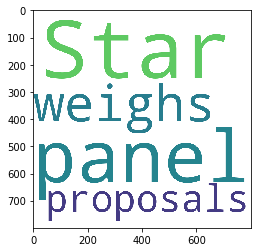

In [0]:
plt.imshow(w1)

In [0]:
w2=WordCloud(width=1000,height=1000,background_color='white',stopwords=set(STOPWORDS),min_font_size=30).generate(random_low.loc[0,'text'])

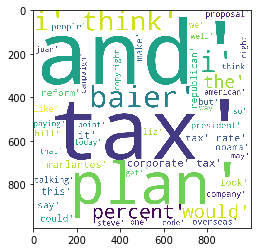

In [0]:
plt.imshow(w2)

In [0]:
random_low=random100[random100['coverage_bin']=="low"]

In [0]:
random_low.head()

,Unnamed: 0.1,archive,compression,compression_bin,coverage,coverage_bin,date,density,density_bin,summary,text,title,url
0,340997,https://web.archive.org/web/2012022319id_/http...,263.875000,high,0.750000,low,1970-01-01 00:33:32.022319,0.750000,abstractive,All-Star panel weighs in on proposals,"['this', 'rush', 'transcript', 'special', 'rep...",Politics of corporate tax plans,http://www.foxnews.com/on-air/special-report/2...
2,664714,https://web.archive.org/web/2016020819id_/http...,20.914286,medium,0.714286,low,1970-01-01 00:33:36.020819,2.828571,mixed,"‘Climate change is real and it is with us,’ sa...","['the', 'u', 'forest', 'service', 'warned', 't...",US Forest Service stretched to breaking point ...,http://www.theguardian.com/world/2016/feb/08/u...
9,221274,https://web.archive.org/web/2013043019id_/http...,90.250000,high,0.750000,low,1970-01-01 00:33:33.043019,1.083333,abstractive,NHL Preview for the Minnesota vs Chicago game ...,"['chicago', 'ap', 'for', 'accomplishment', 'fa...",Minnesota vs Chicago - Preview - NHL - Sports ...,http://www.cbc.ca/sports/hockey/nhl/game/13226...
18,57069,http://web.archive.org/web/20160603025338id_/h...,29.166667,medium,0.416667,low,1970-08-22 08:10:03.025338,0.583333,abstractive,But now he does know some things about his cha...,"['hbo', 'game', 'throne', 'known', 'surprise',...",'Game of Thrones' Red Wedding Actor Didn't Kno...,http://time.com/4351789/game-of-thrones-red-we...
19,464739,https://web.archive.org/web/2013092519id_/http...,41.300000,high,0.650000,low,1970-01-01 00:33:33.092519,4.700000,mixed,BY DAVID HINCKLEY\n\n\t\n\n\t'You can check ou...,"['you', 'check', 'time', 'like', 'eagle', 'obs...","'Breaking Bad' Season 5, Episode 15 recap: Wal...",http://www.nydailynews.com/blogs/channel-surfe...


In [0]:
random_medium=random100[random100['coverage_bin']=="medium"]

In [0]:
random_high=random100[random100['coverage_bin']=="high"]

In [0]:
random_high.head()

,Unnamed: 0.1,archive,compression,compression_bin,coverage,coverage_bin,date,density,density_bin,summary,text,title,url
0,340997,https://web.archive.org/web/2012022319id_/http...,263.875000,high,0.750000,low,1970-01-01 00:33:32.022319,0.750000,abstractive,All-Star panel weighs in on proposals,"['this', 'rush', 'transcript', 'special', 'rep...",Politics of corporate tax plans,http://www.foxnews.com/on-air/special-report/2...
1,236243,https://web.archive.org/web/2014050719id_/http...,61.619048,high,1.000000,high,1970-01-01 00:33:34.050719,11.666667,extractive,Russian President Vladimir Putin wants a delay...,"['mariupol', 'ukraine', 'cnn', 'russian', 'pre...",Report: Putin wants delay in referendum in Ukr...,http://www.cnn.com/2014/05/07/world/europe/ukr...
6,172910,http://web.archive.org/web/20160703043637id_/h...,37.035714,high,1.000000,high,1970-08-22 08:11:43.043637,7.500000,mixed,A 92-year old man's attempts to buy back the h...,"['after', 'raising', 'money', 'internet', 'don...",Ohio 92-Year Old's Offer to Buy Back Home from...,http://abcnews.go.com/Business/ohio-92-year-ol...
8,238599,https://web.archive.org/web/2013122019id_/http...,72.318182,high,0.909091,medium,1970-01-01 00:33:33.122019,2.090909,mixed,The arrest and detention of an Indian consular...,"['cnn', 'the', 'attorney', 'indian', 'diplomat...",Strip-searched Indian diplomat's attorney: U.S...,http://www.cnn.com/2013/12/19/politics/india-u...
9,221274,https://web.archive.org/web/2013043019id_/http...,90.250000,high,0.750000,low,1970-01-01 00:33:33.043019,1.083333,abstractive,NHL Preview for the Minnesota vs Chicago game ...,"['chicago', 'ap', 'for', 'accomplishment', 'fa...",Minnesota vs Chicago - Preview - NHL - Sports ...,http://www.cbc.ca/sports/hockey/nhl/game/13226...


In [0]:
random_low.reset_index(drop=True,inplace=True)
random_medium.reset_index(drop=True,inplace=True)
random_high.reset_index(drop=True,inplace=True)

In [0]:
w1=WordCloud(width=800,height=800,background_color='white',stopwords=set(STOPWORDS),min_font_size=10).generate(random_low.loc[1,'summary'])

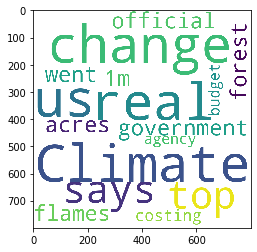

In [0]:
plt.imshow(w1)

In [0]:
w2=WordCloud(width=1000,height=1000,background_color='white',stopwords=set(STOPWORDS),min_font_size=30).generate(random_low.loc[1,'text'])

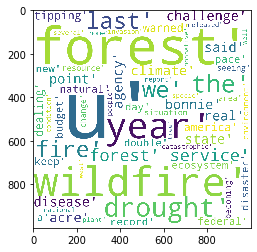

In [0]:
plt.imshow(w2)

**Medium Coverage Word Clouds**

In [0]:
random_medium

,Unnamed: 0.1,archive,compression,compression_bin,coverage,coverage_bin,date,density,density_bin,summary,text,title,url
0,664714,https://web.archive.org/web/2016020819id_/http...,20.914286,medium,0.714286,low,1970-01-01 00:33:36.020819,2.828571,mixed,"‘Climate change is real and it is with us,’ sa...","['the', 'u', 'forest', 'service', 'warned', 't...",US Forest Service stretched to breaking point ...,http://www.theguardian.com/world/2016/feb/08/u...
1,468134,https://web.archive.org/web/2013042119id_/http...,20.469388,medium,1.000000,high,1970-01-01 00:33:33.042119,17.775510,extractive,"He stands 5-8 and weighs 178 pounds, and a few...","['tavon', 'austin', 'stand', 'weighs', 'pound'...",West Virginia’s Tavon Austin has NFL teams thi...,http://www.nydailynews.com/sports/football/aus...
2,254770,https://web.archive.org/web/2012082119id_/http...,35.200000,medium,1.000000,high,1970-01-01 00:33:32.082119,25.000000,extractive,"The upcoming ninth season of NBC's ""The Office...","['updated', 'pm', 'edt', 'tue', 'august', 'the...",'The Office' shuts down after this year,http://www.cnn.com/2012/08/21/showbiz/office-e...
3,136061,http://web.archive.org/web/20160715062804id_/h...,31.812500,medium,0.875000,medium,1970-08-22 08:11:55.062804,1.875000,mixed,This is the third live-streaming video deal Tw...,"['twitter', 'ramping', 'commitment', 'streamin...","Twitter Signs Another Live-Streaming Deal, Thi...",http://fortune.com/2016/07/12/twitter-live-blo...
4,307240,https://web.archive.org/web/2016020719id_/http...,23.217391,medium,0.913043,medium,1970-01-01 00:33:36.020719,4.217391,mixed,An Afghan official says the government expects...,"['kabul', 'afghanistan', 'afghanistan', 'expec...",Afghanistan expects talks with Taliban this month,http://www.foxnews.com/world/2016/02/07/afghan...
5,260205,https://web.archive.org/web/2011122419id_/http...,28.900000,medium,1.000000,high,1970-01-01 00:33:31.122419,4.800000,mixed,Dozens of people have been killed after Islami...,"['by', 'monica', 'mark', 'cnn', 'updated', 'pm...",Dozens killed in Nigeria fighting,http://www.cnn.com/2011/12/24/world/africa/nig...
6,210584,https://web.archive.org/web/2016052119id_/http...,34.102564,medium,0.974359,high,1970-01-01 00:33:36.052119,27.179487,extractive,"U.S. stocks rose, with the S&amp;P 500 rebound...","['stock', 'rose', 's', 'p', 'rebounding', 'low...",U.S. Stocks Climb as Tech Shares Rally While R...,http://www.bloomberg.com/news/articles/2016-05...
7,513953,https://web.archive.org/web/2016092619id_/http...,30.043478,medium,1.000000,high,1970-01-01 00:33:36.092619,3.869565,mixed,At some colleges students introduce themselves...,"['my', 'fall', 'class', 'started', 'recently',...",The New York Times,http://www.nytimes.com/2016/09/26/opinion/pron...
8,57069,http://web.archive.org/web/20160603025338id_/h...,29.166667,medium,0.416667,low,1970-08-22 08:10:03.025338,0.583333,abstractive,But now he does know some things about his cha...,"['hbo', 'game', 'throne', 'known', 'surprise',...",'Game of Thrones' Red Wedding Actor Didn't Kno...,http://time.com/4351789/game-of-thrones-red-we...
9,803781,https://web.archive.org/web/2012081219id_/http...,18.850000,medium,0.550000,low,1970-01-01 00:33:32.081219,1.150000,abstractive,Collection of all USATODAY.com coverage of Str...,"['by', 'jonathan', 'fahey', 'associated', 'pre...",Strait of Hormuz Topics Page,http://content.usatoday.com/topics/topic/Strai...


In [0]:
w1=WordCloud(width=800,height=800,background_color='white',stopwords=set(STOPWORDS),min_font_size=10).generate(random_medium.loc[0,'summary'])

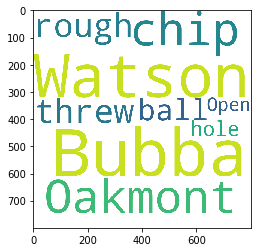

In [0]:
plt.imshow(w1)

In [0]:
w2=WordCloud(width=800,height=800,background_color='white',stopwords=set(STOPWORDS),min_font_size=10).generate(random_medium.loc[0,'text'])

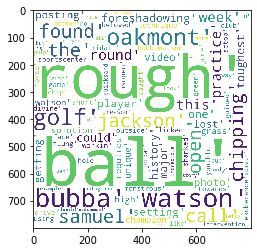

In [0]:
plt.imshow(w2)

In [0]:
w1=WordCloud(width=800,height=800,background_color='white',stopwords=set(STOPWORDS),min_font_size=10).generate(random_medium.loc[3,'summary'])

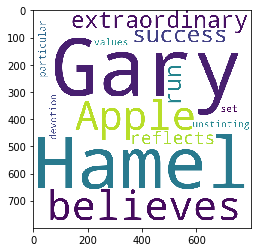

In [0]:
plt.imshow(w1)

In [0]:
w2=WordCloud(width=800,height=800,background_color='white',stopwords=set(STOPWORDS),min_font_size=10).generate(random_medium.loc[3,'text'])

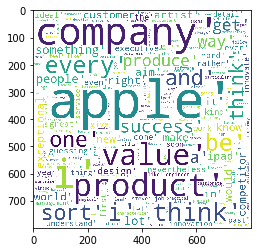

In [0]:
plt.imshow(w2)

High Coverage 

In [0]:
random_high.head()

,Unnamed: 0.1,archive,compression,compression_bin,coverage,coverage_bin,date,density,density_bin,summary,text,title,url
0,45522,http://web.archive.org/web/20110111162446id_/h...,9.212500,low,0.975000,high,1970-08-21 18:08:31.162446,18.450000,extractive,I f the person who came up with the idea of a ...,"['friday', 'august', 'th', 'johnny', 'knoxvill...",A 'HAZZARD'-OUS WASTE. THE DUKES CRASH THE BIG...,http://www.nydailynews.com/archives/entertainm...
1,311534,https://web.archive.org/web/2016101619id_/http...,19.702128,medium,0.978723,high,1970-01-01 00:33:36.101619,6.000000,mixed,Two congressional sources tell Fox News that F...,"['fbi', 'interview', 'summary', 'note', 'provi...",New FBI files contain allegations of 'quid pro...,http://www.foxnews.com/politics/2016/10/16/new...
2,921797,https://web.archive.org/web/2016020319id_/http...,31.666667,medium,1.000000,high,1970-01-01 00:33:36.020319,30.000000,extractive,Los Angeles prosecutors filed misdemeanor crim...,"['los', 'angeles', 'los', 'angeles', 'prosecut...",Criminal charges filed against utility in Sout...,http://www.foxnews.com/us/2016/02/03/criminal-...
3,63232,http://web.archive.org/web/20150524084421id_/h...,8.753846,low,0.984615,high,1970-08-22 05:22:04.084421,59.430769,extractive,Egg on the Face While lunching with an extre...,"['while', 'lunching', 'extremely', 'vital', 'm...",Sunday Observer - NYTimes.com,http://www.nytimes.com/1981/08/30/magazine/sun...
4,768229,https://web.archive.org/web/2012051719id_/http...,7.178571,low,1.000000,high,1970-01-01 00:33:32.051719,19.785714,extractive,A day after the current Giants received their ...,"['a', 'day', 'current', 'new', 'york', 'giant'...",Lawrence Taylor auctioning Super Bowl XXV ring,http://content.usatoday.com/communities/thehud...


In [0]:
w1=WordCloud(width=800,height=800,background_color='white',stopwords=set(STOPWORDS),min_font_size=10).generate(random_high.loc[5,'summary'])

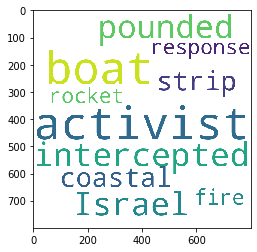

In [0]:
plt.imshow(w1)

In [0]:
w2=WordCloud(width=800,height=800,background_color='white',stopwords=set(STOPWORDS),min_font_size=10).generate(random_high.loc[5,'text'])

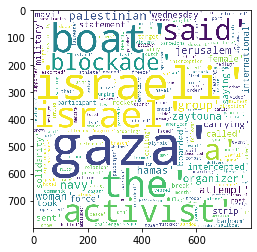

In [0]:
plt.imshow(w2)

In [0]:
w1=WordCloud(width=800,height=800,background_color='white',stopwords=set(STOPWORDS),min_font_size=10).generate(random_high.loc[3,'summary'])

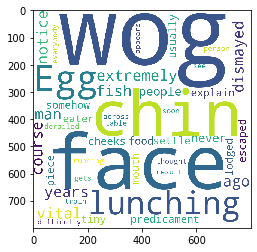

In [0]:
plt.imshow(w1)

In [0]:
w2=WordCloud(width=800,height=800,background_color='white',stopwords=set(STOPWORDS),min_font_size=10).generate(random_high.loc[3,'text'])

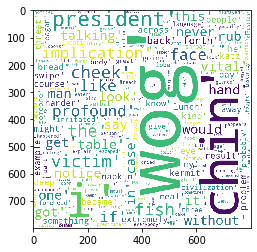

In [0]:
plt.imshow(w2)

In [0]:
random_low.describe()

,Unnamed: 0.1,compression,coverage,density
count,42.000000,42.000000,42.000000,42.000000
mean,511099.238095,36.082404,0.613517,1.281638
std,325474.750448,25.965775,0.140741,1.396812
min,2943.000000,2.046512,0.242424,0.242424
25%,208184.750000,15.892437,0.506944,0.600491
50%,539477.500000,31.000000,0.630682,0.899038
75%,847373.750000,56.681066,0.740476,1.250000
max,994625.000000,92.250000,0.782609,8.250000


In [0]:
random_medium.describe()

,Unnamed: 0.1,compression,coverage,density
count,26.000000,26.000000,26.000000,26.000000
mean,439401.692308,36.897628,0.849721,5.259327
std,302650.349774,28.266574,0.045857,6.874657
min,28809.000000,6.074074,0.787879,0.818182
25%,163123.750000,15.504310,0.801613,1.337340
50%,396371.500000,30.394091,0.847701,2.345161
75%,667707.250000,43.593548,0.884286,5.009698
max,970661.000000,104.300000,0.928571,27.375000


In [0]:
random_high.describe()

,Unnamed: 0.1,compression,coverage,density
count,32.000000,32.000000,32.000000,32.000000
mean,470351.343750,166.703240,0.987324,23.565507
std,350802.884995,773.550790,0.017335,19.133977
min,5521.000000,2.300000,0.944444,1.000000
25%,161568.500000,9.962216,0.976308,6.846154
50%,406175.500000,18.441645,1.000000,21.142857
75%,781732.750000,34.811005,1.000000,34.180851
max,981261.000000,4400.000000,1.000000,85.709877


In [0]:
del data['Unnamed: 0.1']
data.corr()

,compression,coverage,density
compression,1.000000,0.003840,-0.042289
coverage,0.003840,1.000000,0.497773
density,-0.042289,0.497773,1.000000


In [0]:
new=data.iloc[0:100000,:]

In [0]:
new.corr()

,compression,coverage,density
compression,1.000000,-0.001974,-0.046748
coverage,-0.001974,1.000000,0.502827
density,-0.046748,0.502827,1.000000


Text(0, 0.5, 'Density')

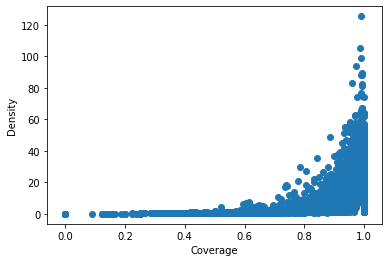

In [0]:

plt.scatter(new['coverage'][:5000],new['density'][:5000])
plt.xlabel("Coverage")
plt.ylabel("Density")

In [0]:

# plt.scatter(new['density'][:5000],new['coverage'][:5000])
# # plt.xlabel("Coverage")
# # plt.ylabel("Density")

In [0]:
new[new['coverage_bin']=="low"].describe()

,compression,coverage,density
count,31817.000000,31817.000000,31817.000000
mean,42.478318,0.622236,1.237324
std,156.945901,0.141333,1.364674
min,0.744444,0.000000,0.000000
25%,13.235294,0.555556,0.714286
50%,26.500000,0.666667,1.000000
75%,47.636364,0.729730,1.333333
max,13664.500000,0.784314,32.190476


In [0]:
new[new['coverage_bin']=="medium"].describe()

,compression,coverage,density
count,33925.000000,33925.000000,33925.000000
mean,39.535590,0.871193,5.827252
std,69.563647,0.046534,7.196672
min,0.954545,0.785714,0.785714
25%,14.666667,0.833333,1.666667
50%,28.769231,0.875000,2.625000
75%,48.555556,0.913043,6.777778
max,9383.846154,0.944310,70.500000


In [0]:
new[new['coverage_bin']=="high"].describe()

,compression,coverage,density
count,34258.000000,34258.000000,34258.000000
mean,48.086566,0.984423,21.009772
std,495.373621,0.019286,16.978441
min,0.980769,0.944444,0.947368
25%,10.239204,0.966667,8.714286
50%,19.500000,1.000000,17.832816
75%,35.475564,1.000000,29.300000
max,42599.000000,1.000000,719.000000


In [0]:
random_medium['coverage_bin']

0        low
1       high
2       high
3     medium
4     medium
5       high
6       high
7       high
8        low
9        low
10      high
11       low
12       low
13      high
14    medium
15      high
16    medium
17    medium
18    medium
19    medium
20      high
21    medium
22       low
23    medium
24       low
25       low
26    medium
27      high
28      high
29      high
30       low
31       low
32       low
33    medium
34      high
35    medium
36    medium
37    medium
38    medium
39       low
40       low
Name: coverage_bin, dtype: object